In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import pickle

In [15]:
df = pd.read_csv('..\dataset\cleaned_data.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sahit\AppData\Local\Temp\ipykernel_10236\3471618515.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\dataset\cleaned_data.csv')


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
525,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
526,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
527,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [42]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Avg. F size (L) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [37]:
columns_to_remove = [
    'Marraige Status (Yrs)',
    'Hip(inch)',
    'Waist(inch)',
    'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

# Remove the columns
df = df.drop(columns=columns_to_remove)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Cycle(R/I),Cycle length(days),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),...,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Avg. F size (L) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.176538,0.210414,0.076991,0.399442,-0.180121,-0.027600,-0.063553,-0.020129,0.091355,...,0.440847,0.469131,0.483023,0.175349,0.286143,-0.017598,0.017766,0.598711,0.126547,0.105429
Age (yrs),-0.176538,1.000000,-0.034978,-0.126180,-0.085700,0.053693,-0.042784,0.212451,0.076684,-0.150287,...,-0.034613,-0.078652,-0.108238,-0.077368,-0.034392,0.129400,0.067647,-0.115102,-0.018845,-0.097945
Weight (Kg),0.210414,-0.034978,1.000000,0.420681,0.201007,-0.002493,-0.054003,0.083907,0.012152,0.001806,...,0.416336,0.181641,0.180237,0.077473,0.072397,0.062800,0.121804,0.172007,-0.021864,-0.010878
Height(Cm),0.076991,-0.126180,0.420681,1.000000,-0.013128,0.003724,0.047290,-0.045533,-0.058111,0.030193,...,0.017175,0.044077,0.073636,-0.018611,0.075168,-0.018173,0.018845,0.112183,-0.019553,-0.050256
Cycle(R/I),0.399442,-0.085700,0.201007,-0.013128,1.000000,-0.199925,-0.076646,-0.054197,0.029263,0.215611,...,0.253261,0.283185,0.218466,0.098280,0.128942,0.040218,0.084256,0.291187,0.032920,0.040138
Cycle length(days),-0.180121,0.053693,-0.002493,0.003724,-0.199925,1.000000,0.046508,0.005143,-0.041443,-0.128342,...,-0.130733,-0.049472,-0.029162,-0.000134,-0.047777,-0.013001,-0.080435,-0.086598,-0.054678,-0.012706
Pregnant(Y/N),-0.027600,-0.042784,-0.054003,0.047290,-0.076646,0.046508,1.000000,0.000880,-0.093810,-0.016501,...,-0.025042,-0.077635,0.019436,0.025132,0.107949,-0.052069,-0.005054,0.044567,-0.117627,-0.017772
No. of aborptions,-0.063553,0.212451,0.083907,-0.045533,-0.054197,0.005143,0.000880,1.000000,-0.010264,-0.030349,...,0.098544,0.017874,-0.026287,-0.008255,-0.082248,0.018536,0.062646,-0.058892,-0.049371,-0.058368
FSH(mIU/mL),-0.020129,0.076684,0.012152,-0.058111,0.029263,-0.041443,-0.093810,-0.010264,1.000000,0.233453,...,-0.044050,0.008213,-0.032334,-0.022869,0.013356,-0.005113,-0.001385,-0.045154,-0.016012,0.024783
LH(mIU/mL),0.091355,-0.150287,0.001806,0.030193,0.215611,-0.128342,-0.016501,-0.030349,0.233453,1.000000,...,0.035552,0.003587,0.010730,-0.075923,0.003085,-0.022819,0.019423,0.012577,-0.016038,0.021893


In [43]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [44]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [45]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
#Using pickle operation to serialize Logistic regression and save the serialized format to a file
# filename = 'finalized_knn.sav'
# pickle.dump(knn, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test)

In [46]:
#show first 5 model predictions on the test data
y_pred = knn.predict(X_test)

In [47]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7542857142857143

In [49]:
print("K nearest neighbours model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

K nearest neighbours model accuracy(in %): 75.42857142857143


In [50]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score

In [51]:
print (average_accuracy/542)
print (max)

70.12756984712699
78.85714285714286


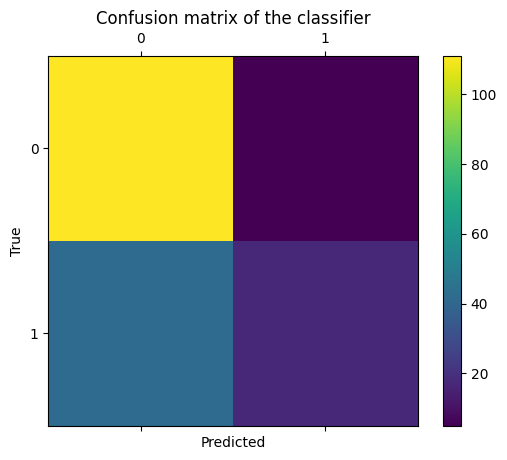

In [52]:
#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

In [58]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Avg. F size (L) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [68]:
import numpy as np

test_input = np.array([
    26,     # Age (yrs) - PCOS can develop in young adults
    80,     # Weight (Kg) - Increased weight is common in PCOS
    158,    # Height (Cm) - Slightly shorter height
    0,      # Cycle Regular (R=1, I=0) - Irregular cycle (I=0)
    50,     # Cycle length (days) - Long cycle length
    0,      # Pregnant (Y=1, N=0) - Not pregnant
    1,      # No. of abortions - History of one abortion (optional)
    6.5,    # FSH (mIU/mL) - Higher than normal can indicate imbalance
    15.0,   # LH (mIU/mL) - Elevated LH level, typical in PCOS
    2.0,    # TSH (mIU/L) - Normal thyroid level (or slightly elevated)
    5.0,    # AMH (ng/mL) - Higher AMH levels indicating PCOS
    25.0,   # PRL (ng/mL) - Slightly elevated prolactin
    10.0,   # Vit D3 (ng/mL) - Low Vitamin D level
    3.0,    # PRG (ng/mL) - Elevated progesterone
    90,     # RBS (mg/dl) - Normal blood sugar
    1,      # Weight gain (Y=1, N=0) - Recent weight gain
    1,      # Hair growth (Y=1, N=0) - Increased hair growth (hirsutism)
    1,      # Skin darkening (Y=1, N=0) - Skin changes indicating hormonal imbalance
    1,      # Hair loss (Y=1, N=0) - Hair thinning/loss can occur
    1,      # Pimples (Y=1, N=0) - Acne can be a symptom
    135,    # BP Systolic (mmHg) - Slightly elevated blood pressure
    85,     # BP Diastolic (mmHg) - Normal blood pressure
    15,     # Follicle No. (L) - Higher number of follicles (typical in PCOS)
    14,     # Avg. F size (L) (mm) - Larger follicle size
    12      # Endometrium (mm) - Thickened endometrium indicating hormonal issues
]).reshape(1, -1)


In [69]:
y = knn.predict(test_input)
y

c:\Users\sahit\OneDrive\Desktop\Maidi\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [70]:
with open('pcos.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)